In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import numpy as np

# Set the parameters for the lognormal distribution
mean = np.log(500e3)
std_dev = mean * 0.1
size = 10000  # Number of samples to generate

# Generate samples from the lognormal distribution
samples = np.random.lognormal(mean, std_dev, size)

# Print the generated samples' five number summary
print(f"Min: {np.min(samples):,.0f}")
print(f"Q1: {np.percentile(samples, 25):,.0f}")
print(f"Median: {np.median(samples):,.0f}")
print(f"Q3: {np.percentile(samples, 75):,.0f}")
print(f"Max: {np.max(samples):,.0f}")

Min: 2,976
Q1: 203,133
Median: 485,140
Q3: 1,180,697
Max: 69,056,185


In [59]:
df = pd.DataFrame(samples, columns=["Price"])

<Axes: >

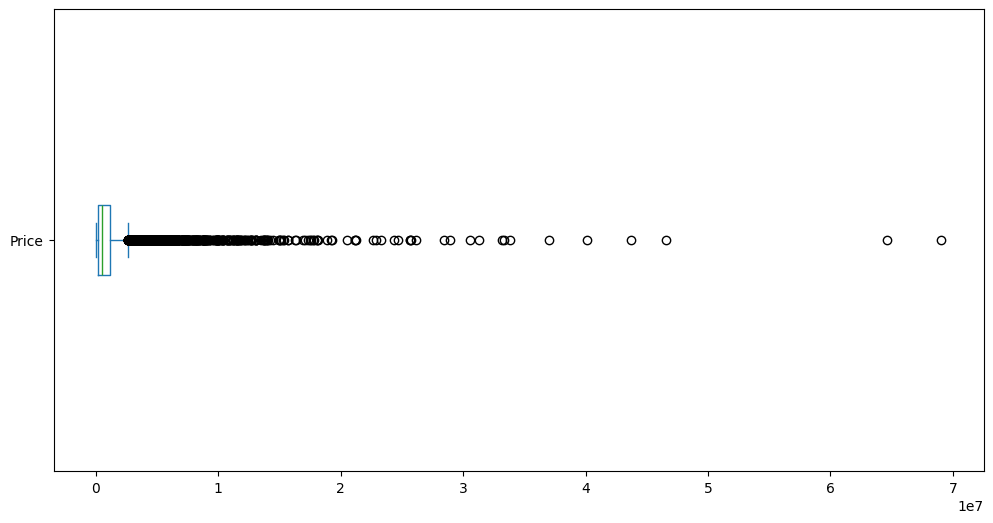

In [60]:
df.plot(kind="box", vert=False, figsize=(12, 6))

array([[<Axes: title={'center': 'Price'}>]], dtype=object)

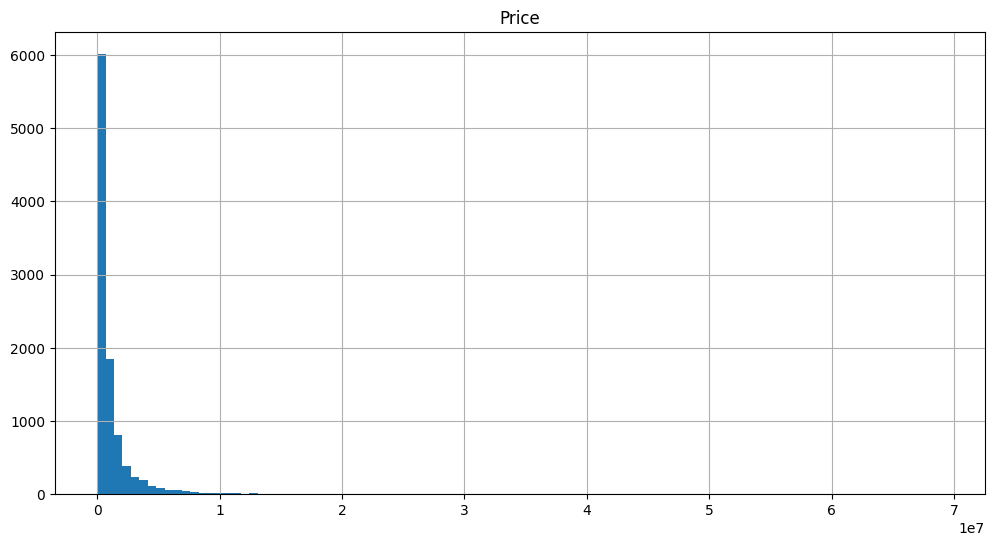

In [61]:
df.hist(bins=100, figsize=(12, 6))

<Axes: ylabel='Frequency'>

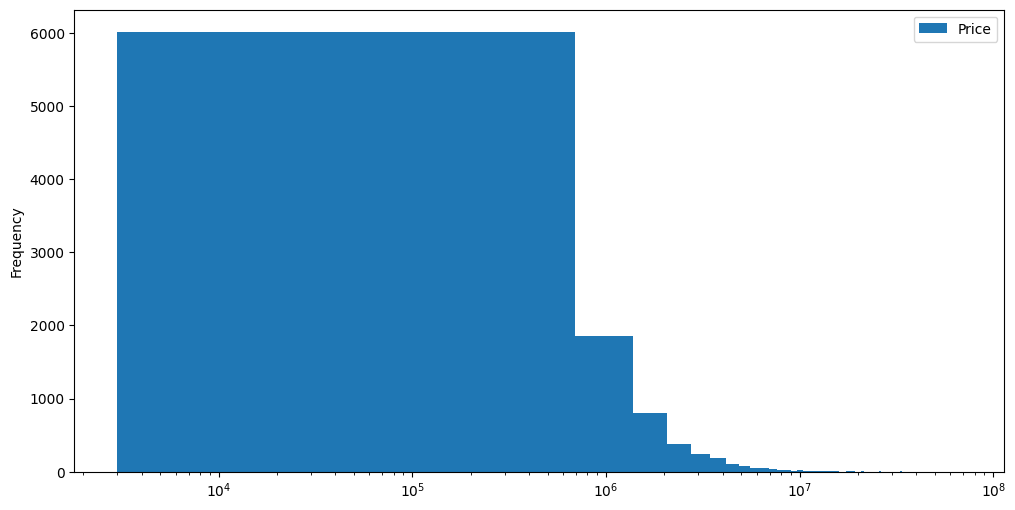

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xscale("log")
df.plot(kind="hist", bins=100, ax=ax)

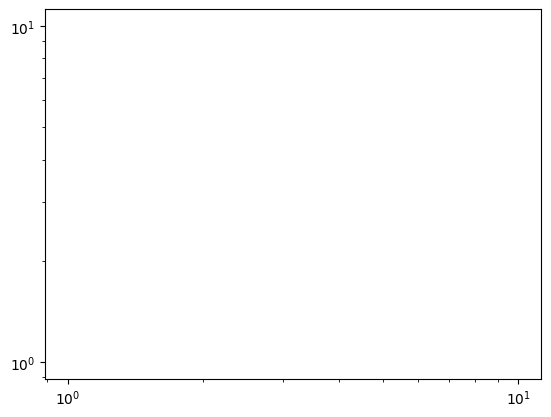

In [36]:
ax = plt.axes(xscale="log", yscale="log")

In [18]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [20]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

In [56]:
# Calculate the bins in log scale
print(np.min(samples))
print(np.max(samples))

bins = np.logspace(np.log10(1000), np.log10(100_000_000), num=10)
counts, _ = np.histogram(samples, bins=bins)
bin_starts = bins[:-1]
bin_ends = bins[1:]

df = pd.DataFrame({"bin_starts": bin_starts, "bin_ends": bin_ends, "counts": counts})
df["labels"] = [
    f"{int(start):,} - {int(end):,}"
    for start, end in zip(df["bin_starts"], df["bin_ends"])
]
df

2975.692661119737
69056185.46719764


,bin_starts,bin_ends,counts,labels
0,1.000000e+03,3.593814e+03,1,"1,000 - 3,593"
1,3.593814e+03,1.291550e+04,28,"3,593 - 12,915"
2,1.291550e+04,4.641589e+04,316,"12,915 - 46,415"
3,4.641589e+04,1.668101e+05,1699,"46,415 - 166,810"
4,1.668101e+05,5.994843e+05,3538,"166,810 - 599,484"
5,5.994843e+05,2.154435e+06,3154,"599,484 - 2,154,434"
6,2.154435e+06,7.742637e+06,1084,"2,154,434 - 7,742,636"
7,7.742637e+06,2.782559e+07,167,"7,742,636 - 27,825,594"
8,2.782559e+07,1.000000e+08,13,"27,825,594 - 100,000,000"


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '1,000 - 3,593'),
  Text(1, 0, '3,593 - 12,915'),
  Text(2, 0, '12,915 - 46,415'),
  Text(3, 0, '46,415 - 166,810'),
  Text(4, 0, '166,810 - 599,484'),
  Text(5, 0, '599,484 - 2,154,434'),
  Text(6, 0, '2,154,434 - 7,742,636'),
  Text(7, 0, '7,742,636 - 27,825,594'),
  Text(8, 0, '27,825,594 - 100,000,000')])

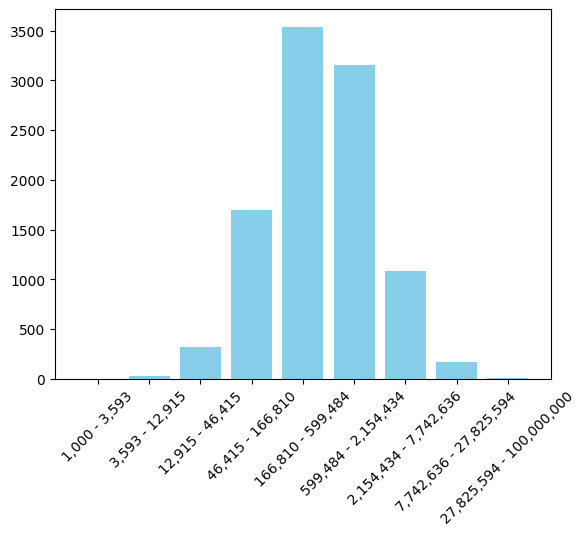

In [50]:
plt.bar(df["labels"], df["counts"], color="skyblue")
plt.xticks(rotation=45)

In [72]:
bins = [
    0,
    1_000,
    5_000,
    10_000,
    50_000,
    100_000,
    500_000,
    1_000_000,
    5_000_000,
    10_000_000,
    50_000_000,
    100_000_000,
]
bin_starts = bins[:-1]
bin_ends = bins[1:]

counts, _ = np.histogram(samples, bins=bins)
print(f"number of samples larger than max(bin_ends): {np.sum(samples > max(bin_ends))}")
df = pd.DataFrame({"bin_starts": bin_starts, "bin_ends": bin_ends, "counts": counts})
df["labels"] = [
    f"{int(start):,} - {int(end):,}"
    for start, end in zip(df["bin_starts"], df["bin_ends"])
]
df

number of samples larger than max(bin_ends): 0


,bin_starts,bin_ends,counts,labels
0,0,1000,0,"0 - 1,000"
1,1000,5000,1,"1,000 - 5,000"
2,5000,10000,18,"5,000 - 10,000"
3,10000,50000,364,"10,000 - 50,000"
4,50000,100000,723,"50,000 - 100,000"
5,100000,500000,3975,"100,000 - 500,000"
6,500000,1000000,1998,"500,000 - 1,000,000"
7,1000000,5000000,2531,"1,000,000 - 5,000,000"
8,5000000,10000000,278,"5,000,000 - 10,000,000"
9,10000000,50000000,110,"10,000,000 - 50,000,000"


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, '0 - 1,000'),
  Text(1, 0, '1,000 - 5,000'),
  Text(2, 0, '5,000 - 10,000'),
  Text(3, 0, '10,000 - 50,000'),
  Text(4, 0, '50,000 - 100,000'),
  Text(5, 0, '100,000 - 500,000'),
  Text(6, 0, '500,000 - 1,000,000'),
  Text(7, 0, '1,000,000 - 5,000,000'),
  Text(8, 0, '5,000,000 - 10,000,000'),
  Text(9, 0, '10,000,000 - 50,000,000'),
  Text(10, 0, '50,000,000 - 100,000,000')])

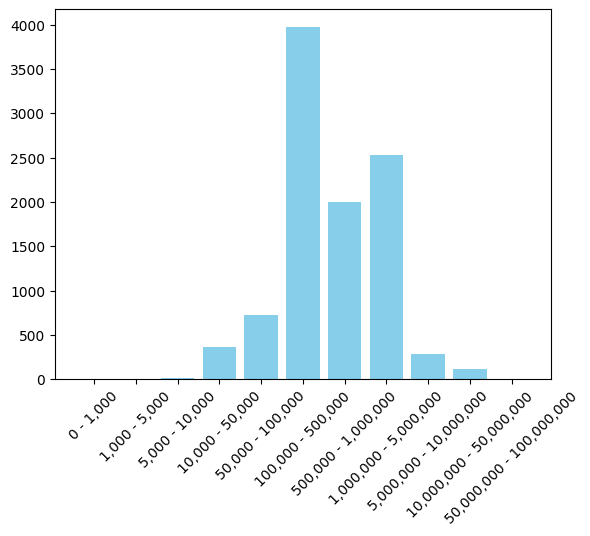

In [73]:
plt.bar(df["labels"], df["counts"], color="skyblue")
plt.xticks(rotation=45)

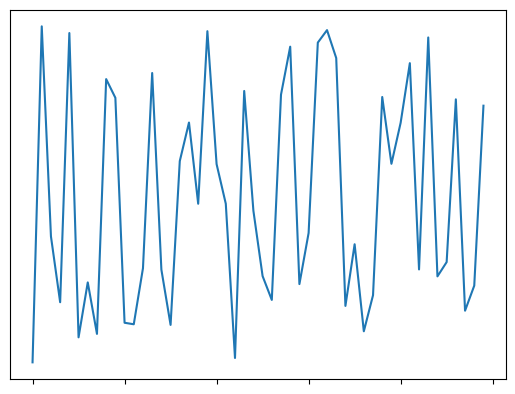

In [74]:
# hide tick marks
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

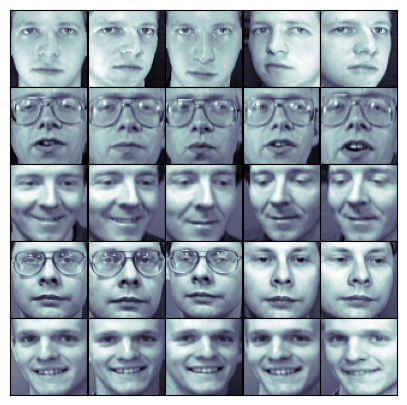

In [77]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)
# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces().images
for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

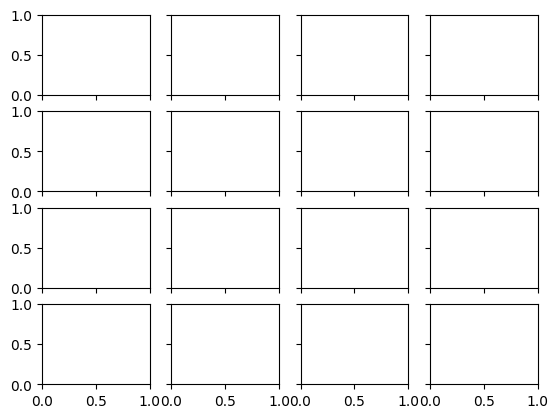

In [78]:
# small plots with crowed x-axis
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

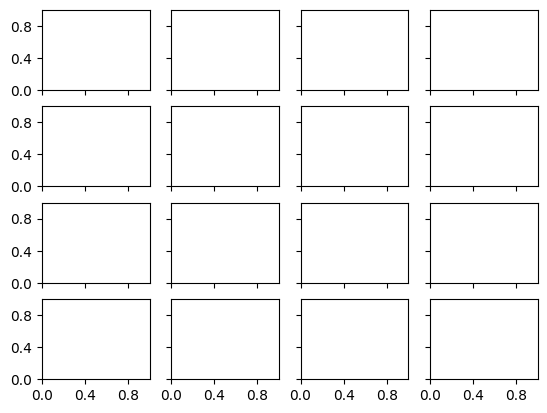

In [80]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

### pi

(0.0, 9.42477796076938)

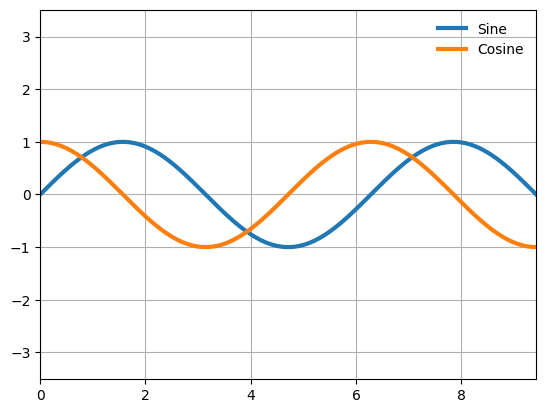

In [81]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label="Sine")
ax.plot(x, np.cos(x), lw=3, label="Cosine")
# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis("equal")
ax.set_xlim(0, 3 * np.pi)

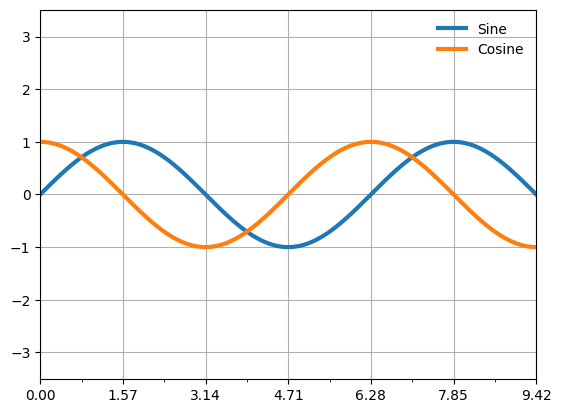

In [82]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

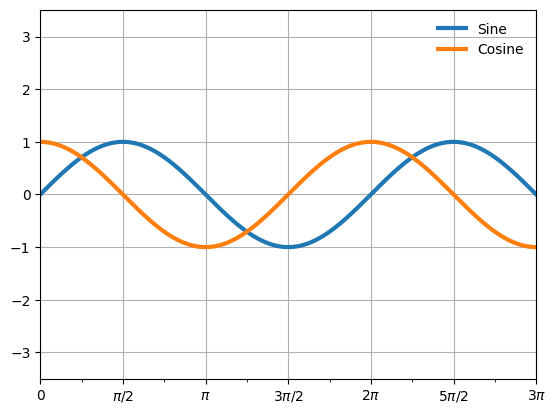

In [83]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)


ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig